In [ ]:
from google.colab import files

# Upload your video (e.g., gauge_video.mp4)
uploaded = files.upload()

Saving how-a-pressure-gauge-works_ecOLk33W.mp4 to how-a-pressure-gauge-works_ecOLk33W.mp4


In [ ]:
import cv2
import os

video_path = '/content/how-a-pressure-gauge-works_ecOLk33W.mp4'  # adjust if needed
output_dir = 'gauge_dataset/images'
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_rate = 15  # extract every 10th frame
frame_id = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_id % frame_rate == 0:
        filename = os.path.join(output_dir, f"frame_{saved_count:04d}.jpg")
        cv2.imwrite(filename, frame)
        saved_count += 1
    frame_id += 1

cap.release()
print(f"✅ Saved {saved_count} frames to {output_dir}")


✅ Saved 32 frames to gauge_dataset/images


In [ ]:
import shutil
from google.colab import files

# Zip the image folder
shutil.make_archive("images_zip", 'zip', "gauge_dataset/images")

# Download it
files.download("images_zip.zip")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from google.colab import files

# Upload the zip file downloaded from Roboflow
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
import zipfile

with zipfile.ZipFile("/home/nirbhays/sem2_V/_V2/gauge-analog.v1i.yolov5pytorch.zip", 'r') as zip_ref:
    zip_ref.extractall("gauge_yolo_dataset")

print("✅ Roboflow dataset extracted.")


✅ Roboflow dataset extracted.


In [4]:
# Clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.31 MiB | 10.85 MiB/s, done.
Resolving deltas: 100% (11931/11931), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s 

In [8]:
# Check if data.yaml looks correct
!cat /content/gauge_yolo_dataset/data.yaml



train: /content/gauge_yolo_dataset/train/images
val: /content/gauge_yolo_dataset/valid/images
test: /content/gauge_yolo_dataset/test/images

nc: 5
names: ['center', 'pointer', 'max_value_mark', 'min_value_mark', 'pointer_tip']


In [9]:
corrected_data_yaml = """
train: /content/gauge_yolo_dataset/train/images
val: /content/gauge_yolo_dataset/valid/images
test: /content/gauge_yolo_dataset/test/images

nc: 5
names: ['center', 'pointer', 'max_value_mark', 'min_value_mark', 'pointer_tip']
"""

with open("/content/gauge_yolo_dataset/data.yaml", "w") as f:
    f.write(corrected_data_yaml)

print("✅ data.yaml updated successfully.")


✅ data.yaml updated successfully.


In [11]:
# Move into the YOLOv5 directory
%cd /content/yolov5

# Start training
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 2 \
  --data /content/gauge_yolo_dataset/data.yaml \
  --weights yolov5n.pt \
  --name gauge_reader_yolov5n


/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-25 14:23:32.576083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745591012.600673    9175 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745591012.608154    9175 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second tim

In [13]:
!python detect.py \
  --weights /content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt \
  --img 640 \
  --source /content/gauge_yolo_dataset/test/images \
  --conf 0.25


detect: weights=['/content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt'], source=/content/gauge_yolo_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1765930 parameters, 0 gradients, 4.1 GFLOPs
image 1/914 /content/gauge_yolo_dataset/test/images/000023_jpg.rf.456cf64804112b05db15a02d408949bb.jpg: 640x640 1 center, 1 pointer, 253.5ms
image 2/914 /content/gauge_yolo_dataset/test/images/000023_jpg.rf.6a7c1f15674f7bc27b68dcc1c46af377.jpg: 640x640 1 center, 1 pointer, 244.1ms
ima

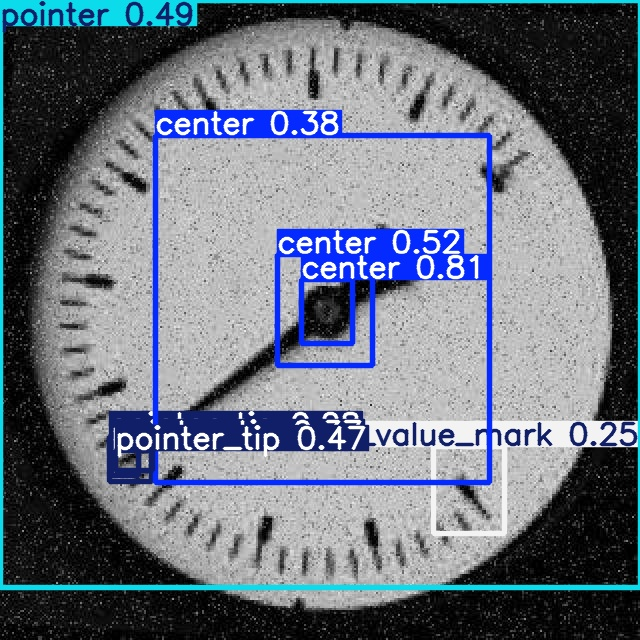

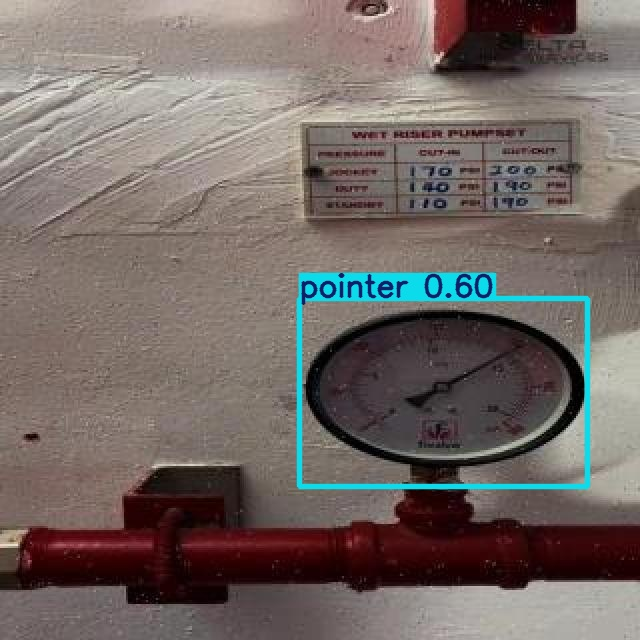

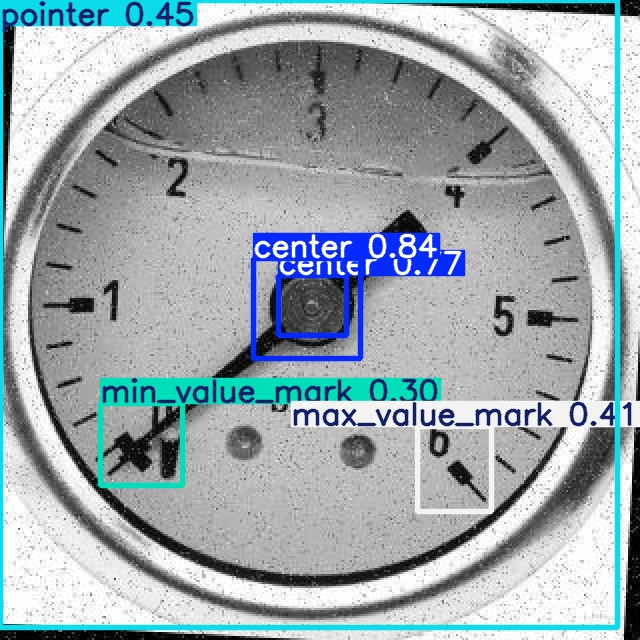

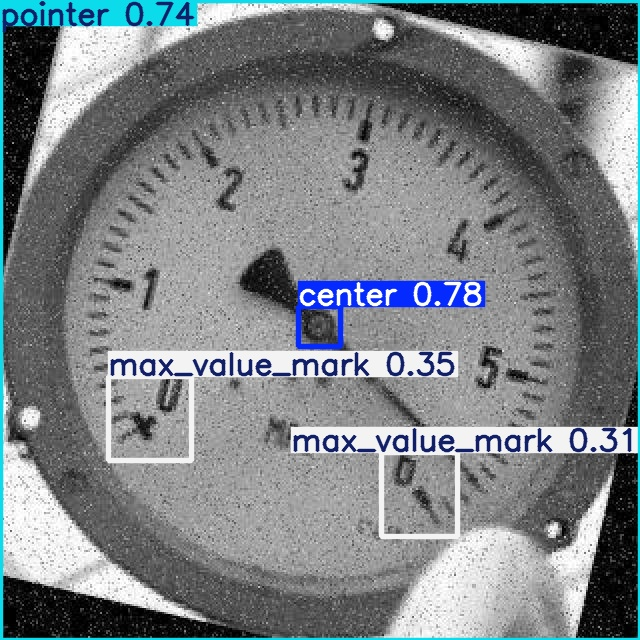

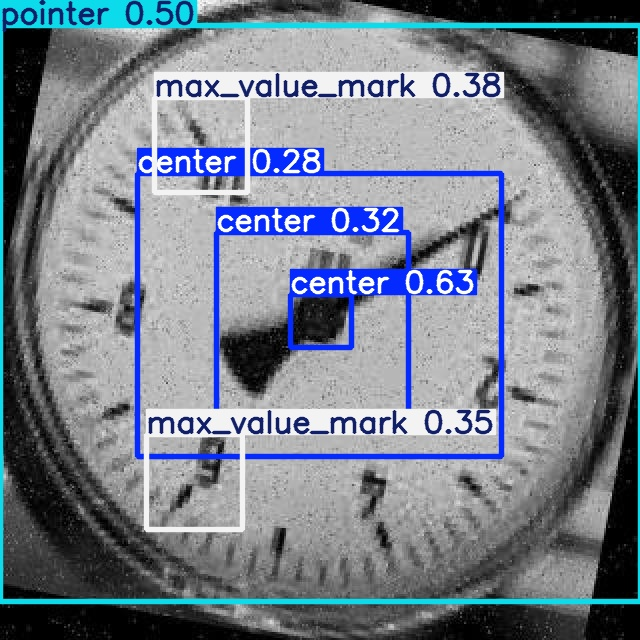

In [14]:
import os
from IPython.display import Image, display

result_path = "runs/detect/exp2"
image_files = [f for f in os.listdir(result_path) if f.endswith(".jpg")]

# Show first 5 predicted images
for img_file in image_files[:5]:
    display(Image(filename=os.path.join(result_path, img_file)))


In [18]:
import os
import math
from PIL import Image

# Paths
label_dir = "/content/yolov5/runs/detect/exp2/labels"
image_dir = "runs/detect/exp"
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])
img_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

# Read image size
img_path = os.path.join(image_dir, img_files[0])
img = Image.open(img_path)
img_width, img_height = img


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/detect/exp2/labels'

In [20]:
!python detect.py \
  --weights /content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt\
  --img 640 \
  --source /content/gauge_yolo_dataset/test/images \
  --conf 0.25 \
  --save-txt


detect: weights=['/content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt'], source=/content/gauge_yolo_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1765930 parameters, 0 gradients, 4.1 GFLOPs
image 1/914 /content/gauge_yolo_dataset/test/images/000023_jpg.rf.456cf64804112b05db15a02d408949bb.jpg: 640x640 1 center, 1 pointer, 166.1ms
image 2/914 /content/gauge_yolo_dataset/test/images/000023_jpg.rf.6a7c1f15674f7bc27b68dcc1c46af377.jpg: 640x640 1 center, 1 pointer, 178.1ms
imag

In [22]:
!ls runs/detect/exp5/labels


000023_jpg.rf.456cf64804112b05db15a02d408949bb.txt
000023_jpg.rf.6a7c1f15674f7bc27b68dcc1c46af377.txt
000042_jpg.rf.4f28d3722390bc2f4c60071dacb19123.txt
000090_png_jpg.rf.4ca135f13d1d579e6045c867ffacd494.txt
000090_png_jpg.rf.bc180e4b1921c22cea1ec5122f4260b5.txt
00017-jpg-5dhbkd8h-ingestion-585c5dcfbb-ltlqg_jpg.rf.17679fa8f6ea74d6dbf44a9428835204.txt
00017-jpg-5dhbkdfc-ingestion-585c5dcfbb-qz9dm_jpg.rf.35595827b5be058e06ca783ce2aac151.txt
00021_jpg.rf.91b8308f423def65487beef987a0e642.txt
0004282_water-pressure-gauge-0-100-psi_600_jpeg_jpg.rf.c377f7cf93954ea24f822a8c5664c3e2.txt
00143_jpg.rf.71ffb0ae2a91e31f21022e6613021570.txt
00213_jpg.rf.3e59617d20ac976a947226b23ca7047c.txt
00213_jpg.rf.a4169c57f4f37ec07fd9a5f11cd1aa9f.txt
00213_jpg.rf.ac09b26f0fe63635fe42af94be9f51b7.txt
00630238_jpg.rf.07f695ebe736f64b70acf891fba03ffb.txt
011046-Mooneyes-60-psi-Oil-Pressure-Gauge-2_2000x_jpg.rf.089f63169d4a98b25c670d2bf296d419.txt
01ac1c50-d0a6-11ed-b077-2089845231c1_jpeg-jpg-5dhbkd8g-ingestion-585

In [24]:
pip install ace_tools

In [27]:
import os
import math
from PIL import Image
import pandas as pd

label_dir = "runs/detect/exp5/labels"
image_dir = "runs/detect/exp5"
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])
img_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

# Class IDs based on your mapping
CLASS_IDS = {
    'center': 0,
    'pointer': 1,
    'max_value_mark': 2,
    'min_value_mark': 3,
    'pointer_tip': 4
}

# Convert YOLO bbox to pixel coordinates
def yolo_to_center(bbox, img_w, img_h):
    x_center = float(bbox[1]) * img_w
    y_center = float(bbox[2]) * img_h
    return x_center, y_center

# Compute angle between 2 vectors
def angle_between(a, b):
    angle = a - b
    return (angle + 360) % 360

results = []

for label_file in label_files:
    img_file = label_file.replace(".txt", ".jpg")
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(img_path):
        continue

    img = Image.open(img_path)
    img_w, img_h = img.size

    coords = {}
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id in CLASS_IDS.values():
                coords[class_id] = yolo_to_center(parts, img_w, img_h)

    # Skip if any required class is missing
    if not all(k in coords for k in [0, 2, 3, 4]):
        continue

    x1, y1 = coords[CLASS_IDS['center']]
    x2, y2 = coords[CLASS_IDS['pointer_tip']]
    xmin, ymin = coords[CLASS_IDS['min_value_mark']]
    xmax, ymax = coords[CLASS_IDS['max_value_mark']]

    # Raw angle
    theta = math.degrees(math.atan2(y2 - y1, x2 - x1))

    # Min/max marker angles
    theta_min = math.degrees(math.atan2(ymin - y1, xmin - x1))
    theta_max = math.degrees(math.atan2(ymax - y1, xmax - x1))

    adjusted_theta = angle_between(theta, theta_min)
    gauge_sweep = angle_between(theta_max, theta_min)

    ratio = adjusted_theta / gauge_sweep
    value = ratio * 100  # Gauge range is 0–100 psi

    results.append({
        "image": img_file,
        "theta": round(theta, 2),
        "adjusted_theta": round(adjusted_theta, 2),
        "sweep": round(gauge_sweep, 2),
        "value_predicted": round(value, 2)
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# Show first few rows
print("✅ Predicted values from pointer angle:")
df.head()


✅ Predicted values from pointer angle:


,image,theta,adjusted_theta,sweep,value_predicted
0,17-13-00-14HTC12CP505-1-jpg-5dhblskk-ingestion...,-70.70,252.49,106.03,238.14
1,240_F_40777245_GtvVq7qzydKXt9HncoWpjZ52r5m8iA6...,-117.14,100.22,263.43,38.04
2,2_jpeg_jpg.rf.6e1566945f2e87d46302a7605cee8b91...,142.41,1.71,269.47,0.64
3,71yKYaOu7sL_jpg.rf.1ce2820290f0a5ad2603b15826b...,125.73,359.14,274.35,130.90
4,9-13-00-14HTQ22CP502-2-jpg-5dhbp5tq-ingestion-...,144.53,7.87,267.58,2.94


In [28]:
# Save and download the predictions
df.to_csv("gauge_predictions.csv", index=False)

from google.colab import files
files.download("gauge_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!python export.py \
  --weights /content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt \
  --img 640 \
  --include onnx


export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1765930 parameters, 0 gradients, 4.1 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.pt with output shape (1, 25200, 10) (3.7 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 151.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.5s, installed 1 package: ['onnx>=1.12.0']
WARNING ⚠️ requiremen

In [31]:
!pip install onnx onnx-tf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 35.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [34]:
!pip uninstall -y keras
!pip install keras==2.11.0
!pip install onnx==1.12.0 onnx-tf==1.10.0


Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
  Using cached keras-2.11.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.


  Using cached onnx-1.12.0.tar.gz (10.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached protobuf-3.20.1-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.1-py2.py3-none-any.whl (162 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for onnx
  Running setup.py clean for onnx
Failed to build onnx
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (onnx)


In [35]:
from onnx_tf.backend import prepare
import onnx

# Load ONNX model
onnx_model = onnx.load("/content/yolov5/runs/train/gauge_reader_yolov5n2/weights/best.onnx")

# Convert to TensorFlow
tf_rep = prepare(onnx_model)
tf_rep.export_graph("/content/yolov5/yolov5_tf_model")


ModuleNotFoundError: No module named 'keras.src.engine'